Testing the type of data in the constructors table

In [3]:
import pymysql
import pymysql.cursors
import matplotlib.pyplot as plt
import numpy as np
import pickle

from f1predict.common import common

In [4]:
#Set up a database connection:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='default',
                             db='f1db',
                             charset='utf8',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    with connection.cursor() as cursor:
        sql = "SELECT `driverId`, `forename`, `surname` FROM `drivers`"
        cursor.execute(sql)
        result = cursor.fetchall()
        for x in result:
            print(str(x.get('driverId')) + ", " + x.get('forename') + " " + x.get('surname'))
        print()
        
        sql = "SELECT `constructorId`, `name` FROM `constructors`"
        cursor.execute(sql)
        result = cursor.fetchall()
        for x in result:
            print(str(x.get('constructorId')) + ", " + x.get('name'))
        print()
        
        sql = "SELECT `raceId`, `circuitId`, `name` FROM `races` where `year`=" + str(common.getCurrentYear() + 1)
        cursor.execute(sql)
        results = cursor.fetchall()
        for x in results:
            print(str(x.get('raceId')) + ", " +  str(x.get('circuitId')) + ", " + x.get('name'))
finally:
    connection.close()

1, Lewis Hamilton
2, Nick Heidfeld
3, Nico Rosberg
4, Fernando Alonso
5, Heikki Kovalainen
6, Kazuki Nakajima
7, Sébastien Bourdais
8, Kimi Räikkönen
9, Robert Kubica
10, Timo Glock
11, Takuma Sato
12, Nelson Piquet Jr.
13, Felipe Massa
14, David Coulthard
15, Jarno Trulli
16, Adrian Sutil
17, Mark Webber
18, Jenson Button
19, Anthony Davidson
20, Sebastian Vettel
21, Giancarlo Fisichella
22, Rubens Barrichello
23, Ralf Schumacher
24, Vitantonio Liuzzi
25, Alexander Wurz
26, Scott Speed
27, Christijan Albers
28, Markus Winkelhock
29, Sakon Yamamoto
30, Michael Schumacher
31, Juan Pablo Montoya
32, Christian Klien
33, Tiago Monteiro
34, Yuji Ide
35, Jacques Villeneuve
36, Franck Montagny
37, Pedro de la Rosa
38, Robert Doornbos
39, Narain Karthikeyan
40, Patrick Friesacher
41, Ricardo Zonta
42, Antônio Pizzonia
43, Cristiano da Matta
44, Olivier Panis
45, Giorgio Pantano
46, Gianmaria Bruni
47, Zsolt Baumgartner
48, Marc Gené
49, Heinz-Harald Frentzen
50, Jos Verstappen
51, Justin Wilso

0.41707484380848764
0.2778752321086688
1.2527192334238295


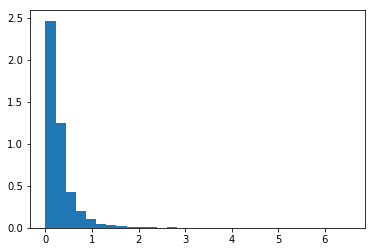

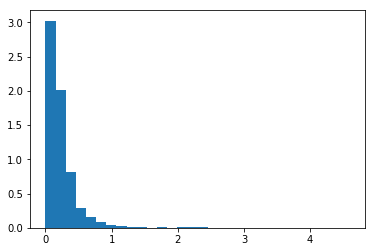

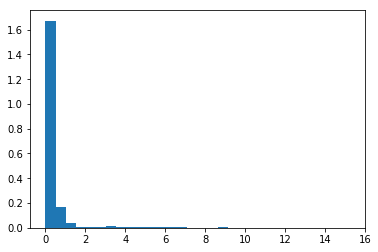

In [8]:
with open('../out/driver_variances.pickle', 'rb') as handle:
    driver_variances = pickle.load(handle)
with open('../out/const_variances.pickle', 'rb') as handle:
    const_variances = pickle.load(handle)
with open('../out/engine_variances.pickle', 'rb') as handle:
    engine_variances = pickle.load(handle)

plt.subplots()
plt.hist(driver_variances, density=True, bins=30)
print(np.std(driver_variances))
plt.subplots()
plt.hist(const_variances, density=True, bins=30)
print(np.std(const_variances))
plt.subplots()
plt.hist(engine_variances, density=True, bins=30)
print(np.std(engine_variances))
